<a href="https://colab.research.google.com/github/lindokuhlejele/demos/blob/master/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import library
import pandas as pd
import numpy as np
import datetime as dt

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for machine learning algorithm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [0]:
from google.colab import files

In [0]:
uploaded = files.upload()

Saving Online Retail.csv to Online Retail.csv


In [0]:
import io

In [0]:
sample_df = pd.read_csv(io.StringIO(uploaded['Online Retail.csv'].decode('utf-8')))

In [0]:
sample_df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In the preceding code, I was performing the initial steps for data preprocessing which are removing duplicate values, missing value processing, data consistency processing, converting data types, and outlier processing.

In [0]:
#1. Removing duplicate values - Here we are trying to detect if there are any duplicates from within the dataset
Sample_df_NoDup=sample_df.drop_duplicates(subset=['InvoiceNo','StockCode','Description','Quantity','InvoiceDate','UnitPrice','CustomerID','Country'])
dup=sample_df.shape[0]-sample_df.shape[0]
print('duplicates =',dup)

duplicates = 0


So 0 duplicates were found within the dataset, and so we continue to do **missing value processing**

In [0]:
#2. Missing Value processing
# Because we want to study the user's buying behavior and product sales, we delete the missing data of user id or product id. 
Sample_df_NoDupNA=Sample_df_NoDup.dropna(subset=['InvoiceNo','CustomerID'],how='any')
missing=Sample_df_NoDup.shape[0]-Sample_df_NoDupNA.shape[0]
print('missings =',missing)

missings = 135037


So a total of 135037 records were removed. With no missing values for either customer id or invoice no, we can now easily measure each customer's buying behaviors.

In [0]:
#3. Data consistency processing
#Before we check for any data inconsistencies, we need to define our dataset i.e. we need to know data types for each column
sample_df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [0]:
#3. Data consistency processing
# we notice that quantity is an int64 variable. Since we might want to do mathematical calculations on quantity and unit price, we'll make the the same data types
# so we conver quantity to float64 as well and show the new data types after the changes
Sample_df_NoDupNA['Quantity']=Sample_df_NoDupNA['Quantity'].astype('float')
Sample_df_NoDupNA['UnitPrice']=Sample_df_NoDupNA['UnitPrice'].astype('float')
print('Data type after changing:\n',Sample_df_NoDupNA.dtypes) 


Data type after changing:
 InvoiceNo       object
StockCode       object
Description     object
Quantity       float64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
#3. We might also want to change the data type for invoice date from 'object' to a 'datetime' datatype since it displays date and time
# we would split it in future if the need arises
Sample_df_NoDupNA['InvoiceDate'] = Sample_df_NoDupNA['InvoiceDate'].astype('datetime64[ns]')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
#3. Displaying the changed invoice date data type
print('Date data type:\n',Sample_df_NoDupNA.dtypes)

Date data type:
 InvoiceNo              object
StockCode              object
Description            object
Quantity              float64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object


In [0]:
#3. Data that does not match the date format during the data conversion process will be converted to a null value. 
#so again, we delete the missing value.
Sample_df_NoDupNA=Sample_df_NoDupNA.dropna(subset=['InvoiceNo','CustomerID','InvoiceDate'],how='any')

In [0]:
#4. Outlier processing
#We can define an outlier as a rare chance of occurrence within a given data set.

#Before we do any outlier processing, we need to check if there are any outliers from within the dataset
Sample_df_NoDupNA.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [0]:
#4. Outlier processing
#From the above output, the minimum number of products purchased in the description indicator is '-8095', and the unit price of the product is '0'
#This is an example of an unusual occurance (a negative quantity and a 0 unit price)

#To solve this we need to delete the abnormal value to filter out the appropriate data
#So we only include data with qunatity>0 and Unit price>0

querySer=Sample_df_NoDupNA.loc[:,'Quantity']>0
Sample_df_NoDupNA=Sample_df_NoDupNA.loc[querySer,:]
querySer1=Sample_df_NoDupNA.loc[:,'UnitPrice']>0
Sample_df_NoDupNA=Sample_df_NoDupNA.loc[querySer1,:]
print('after delete outlier:',Sample_df_NoDupNA.shape)

after delete outlier: (392692, 8)


In [0]:
#4. Outlier processing
#After two conditions are judged, the data set size is (392692, 10). 
#In order to check the processed result, we check the description index again:

Sample_df_NoDupNA.describe()

,Quantity,UnitPrice,CustomerID
count,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,15287.843865
std,180.492832,22.241836,1713.539549
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


In [0]:
#5. Data Size
#Finally we would wanna limit the size of the data to be a 12 month period
#The original data spans from 2010-12-1 to 2011-12-9, which approximatelty 1 year and and 8 days
#This makes the data in December less than a month

#For the convenience of analysis and discussion, we only consider the following period: 2010-12-01 to 2011-11-30, 12 months.
querySer2=Sample_df_NoDupNA.loc[:,'InvoiceDate']<'2011-12-01'
Sample_df_NoDupNA=Sample_df_NoDupNA.loc[querySer2,:]
print('delect data after 2011-11-30:',Sample_df_NoDupNA.shape)


delect data after 2011-11-30: (375666, 8)


**6. DESCRIPTIVE STATISTICAL ANALYSIS AND K-MEANS CLUSTERING**

In [0]:
#6. Descriptive statistical analysis
#For the purpose of this analysis:
#The e-retail data analysis indicators applicable to this analysis include two categories. 
#The first is operational indicators, which can help e-commerce retailers understand their operation, identify consumer habits and optimize operational structure and improv efficiency. 
#the second category is RFM indicators. RFM (R-Recency, F-Frequency, M-Monetary) is a commonly used method for identifying value users. 
#Value users are often the users with small proportion but contribute large sales and profit.

#This is the customer population that e-commerce companies need to pay attention to. 
#For this we will use the K-means clustering algorithm to group users, and focus on determining the consumer behavior habits of value users.

#6.1 Calculation of operational indicators

#--6.1.1 Checking for monthly transactions--

#Firstly, i forgot to split the date into month and year so I'll start by doing that:
Sample_df_NoDupNA['Month'] = pd.DatetimeIndex(Sample_df_NoDupNA['InvoiceDate']).month
Sample_df_NoDupNA['Year'] = pd.DatetimeIndex(Sample_df_NoDupNA['InvoiceDate']).year

Sample_df_NoDupNA.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010


In [0]:
#--6.1.1 Checking for monthly transactions--
#The code below retrieves the number of transactions per sales month
#The calculation results show that the sales orders in September, October, and November 2010 are generally higher than other months, and November 2011 
#produced the highest value of 2,657. 
#It is possible to conclude that the online store had a year-end promotion or seasonal users purchased a large number of winter products. 
#This can be confirmed by querying the product with the highest sales share.

transUni=Sample_df_NoDupNA.drop_duplicates(subset=['InvoiceNo'])
monthly_trans=transUni.groupby(['Year','Month'])['InvoiceNo'].count()
print('monthly transaction :\n',monthly_trans)

monthly transaction :
 Year  Month
2010  12       1400
2011  1         987
      2         997
      3        1321
      4        1149
      5        1555
      6        1393
      7        1331
      8        1280
      9        1755
      10       1929
      11       2657
Name: InvoiceNo, dtype: int64


In [0]:
#--6.1.2 Monthly sales--
#In terms of sales, although transactions were relatively high in 2010, sales were not as high. 
#Monthly sales in September, October and November 2011 are significantly higher than other months.
Sample_df_NoDupNA['Amount']=Sample_df_NoDupNA.Quantity*Sample_df_NoDupNA.UnitPrice
monthly_sales=Sample_df_NoDupNA.groupby(['Year','Month'])['Amount'].sum()
print('monthly sales:\n',monthly_sales)

monthly sales:
 Year  Month
2010  12        570422.730
2011  1         568101.310
      2         446084.920
      3         594081.760
      4         468374.331
      5         677355.150
      6         660046.050
      7         598962.901
      8         644051.040
      9         950690.202
      10       1035642.450
      11       1156205.610
Name: Amount, dtype: float64


In [0]:
#--6.1.3 Monthly average sales--
#It is calculated that the monthly average sales amount is around 697,501.54 pounds.
#But monthly sales in September, October and November 2011 are much higher than the monthly average sales.
monthSales=Sample_df_NoDupNA.groupby(['Year','Month'])['Amount'].sum()
avg_monthSales=round(monthSales.sum()/12,2)
print('Average of monthly sales:',avg_monthSales)

Average of monthly sales: 697501.54


In [0]:
#--6.1.4 Weekly transactions--
#before checking for weekly transactions, we had to create a 'week' column
#First determine what the week of each transaction date corresponds to, herein we use a number to indicate which day is.
Sample_df_NoDupNA['Week']=Sample_df_NoDupNA.InvoiceDate.map(lambda x:x.weekday())
Sample_df_NoDupNA.head()

transUni=Sample_df_NoDupNA.drop_duplicates(subset=['InvoiceNo'])
weekly_trans=transUni.groupby(['Week'])['InvoiceNo'].count()
print('weekly transaction:\n',weekly_trans)



weekly transaction:
 Week
0    2747
1    3074
2    3351
3    3801
4    2674
6    2107
Name: InvoiceNo, dtype: int64


In [0]:
#--6.1.4 We notice that there is no number 5 from the output
#So we check whether the dataset contaiins number 5 or not
#It is confirmed that there is no number 5. According to the original data set, the number of 5 corresponds to Saturday.
#We might conclude the system being offline or under maintenance on a saturday
#It might also be possible that the e-commerce store does not operate on a saturday
Sample_df_NoDupNA.Week.unique()


array([2, 3, 4, 6, 0, 1])

In [0]:
#--6.1.5 Weekly sales--
weeklySales=Sample_df_NoDupNA.groupby(['Week'])['Amount'].sum()
print('weekly sales:\n',weeklySales)

weekly sales:
 Week
0    1305523.311
1    1651744.141
2    1515053.230
3    1878214.400
4    1254225.051
6     765258.321
Name: Amount, dtype: float64


In [0]:
#--6.1.6 Average weekly sales--
#The result is 160,961.89 euros, which is the average weekly sales
#The average weekly sales are less than any weekly sales, this means operators need to initially evaluate the sales for each week.
avg_weeklySales=round(weeklySales.sum()/52,2)
print('Average of weekly sales:',avg_weeklySales)

Average of weekly sales: 160961.89


In [0]:
#--6.1.7 Sales per customer--
#Sales per customer = total sales / total number of customers, the calculation result unit price is 1947.87 euros
#that is, the average contribution per consumer in that year is 1947.87 euros.
total_Sales=Sample_df_NoDupNA.Amount.sum()
total_customer=Sample_df_NoDupNA.drop_duplicates(subset=['CustomerID']).shape[0]
#Sales per customer algorithm
sales_perCustomer=round(total_Sales/total_customer,2)
print('sales per customer=',sales_perCustomer)

sales per customer= 1947.87


In [0]:
#--6.1.8 Sales per item--
#Sales per item = total sales / total number of products sold, the average price per product is 1.72 euros.
total_product=Sample_df_NoDupNA.Quantity.sum()
#Sales per item
sale_perItem=round(total_Sales/total_product,2)
print('sales per item=',sale_perItem)

sales per item= 1.72


**7 Calculation of RFM indicators**
To identify value users (users who have more impact on sales of the online store) I've researched and found that the **RFM Model** is one of the classic methods for identifying value users. The model describes 3 variables namely **Recency, Frequency, and Monetary**

In [0]:
#7.1 Recency
#Recency is defined as time in month since the last purchase.
#i.e. how recent a purchase took place after the last purchase
Last_purchase=Sample_df_NoDupNA.groupby(['CustomerID']).InvoiceDate.max()
First_purchase=Sample_df_NoDupNA.groupby(['CustomerID']).InvoiceDate.min()
Last_purchase.head()
First_purchase.head()

CustomerID
12346.0   2011-01-18 10:01:00
12347.0   2010-12-07 14:57:00
12348.0   2010-12-16 19:09:00
12349.0   2011-11-21 09:51:00
12350.0   2011-02-02 16:01:00
Name: InvoiceDate, dtype: datetime64[ns]

In [0]:
First_purchase.head()

CustomerID
12346.0   2011-01-18 10:01:00
12347.0   2010-12-07 14:57:00
12348.0   2010-12-16 19:09:00
12349.0   2011-11-21 09:51:00
12350.0   2011-02-02 16:01:00
Name: InvoiceDate, dtype: datetime64[ns]

In [0]:
#First we calculate the number of days from the day of the last purchase, and then calculate in month.
Max_date=Sample_df_NoDupNA.InvoiceDate.max()+dt.timedelta(days=1)
Recency_days=Last_purchase.map(lambda x:(x-Max_date).days)
#Recency in months
Recency_months=Recency_days.map(lambda x:round((-1*x)/30,1))
Recency_months.head()

CustomerID
12346.0    10.6
12347.0     1.1
12348.0     2.3
12349.0     0.4
12350.0    10.1
Name: InvoiceDate, dtype: float64

In [0]:
#To understand the above output, we can check out the description of the statistical indicators.
Recency_months.describe()

count    4297.000000
mean        3.082104
std         3.285181
min         0.000000
25%         0.600000
50%         1.700000
75%         4.900000
max        12.200000
Name: InvoiceDate, dtype: float64

In [0]:
#We can use customer-driven business strategy to improve users in segments of [1, 2] and [2, 3], 
#that is, 1 to 2 months, and shopping activities within 2 to 3 months in order to promote the users to shop within [0,1] time frame.
#To gain a much more better understanding, we will also use a histogram
bins1=[0,1,2,3,4,5,6,7,8,9,10,11,12,13]
pd.cut(Recency_months,bins1).value_counts()

(0, 1]      1663
(1, 2]       742
(2, 3]       437
(3, 4]       226
(4, 5]       198
(5, 6]       183
(6, 7]       182
(8, 9]       161
(7, 8]       142
(9, 10]      119
(10, 11]     118
(11, 12]      79
(12, 13]      46
Name: InvoiceDate, dtype: int64

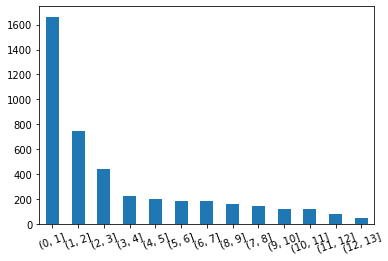

In [0]:
#Histogram
#The histogram shows a much more clear view of purchasing recency time frames
pd.cut(Recency_months,bins1).value_counts().plot.bar(rot=20)

In [0]:
#7.2 Frequency
#Frequency is defined as the shopping frequency, which is the total number of purchases made by the users in the year of analysis.
Unique_purchase=Sample_df_NoDupNA.drop_duplicates(subset=['InvoiceNo'])
Freq_purchase=Unique_purchase.groupby(['CustomerID']).InvoiceNo.count()
Freq_purchase.head()

CustomerID
12346.0    1
12347.0    6
12348.0    4
12349.0    1
12350.0    1
Name: InvoiceNo, dtype: int64

In [0]:
#7.2 Frequency

#7.2.1 Descriptive statistical indicators:
Freq_purchase.describe()
#From the output below the frequency of purchase varies greatly, with a minimum of 1 time and a maximum of 200 times.

count    4297.000000
mean        4.131720
std         7.412705
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max       200.000000
Name: InvoiceNo, dtype: float64

In [0]:
#7.2 Frequency
#From the ouput we see that Most users have purchase record within 1 to 20 times in a year, which is more likely to be a normal situation. 
#Here, we should pay attention to some discrete values:
#For example, there is 1 user who consume 100 to 120 times a year have 1 user, and 2 users have 180 to 200 purchase records which seems about high. 
#Our analysis will make special treatment for these discrete values.
bins2=[1,20,40,60,80,100,120,140,160,180,200]
pd.cut(Freq_purchase,bins2).value_counts()

(1, 20]       2673
(20, 40]        65
(40, 60]        12
(80, 100]        4
(180, 200]       2
(60, 80]         2
(100, 120]       1
(160, 180]       0
(140, 160]       0
(120, 140]       0
Name: InvoiceNo, dtype: int64

In [0]:
#7.3 Monetary
#Monetary is defined as the total amount spent by the users within one year.
#from the output below the total amount of consumption per user varies widely, with a minimum of 2.9 euros and a maximum of 268,478 euros.
Money_purchase=Sample_df_NoDupNA.groupby(['CustomerID']).Amount.sum()
Money_purchase.head()
Money_purchase.describe()

count      4297.000000
mean       1947.874902
std        8351.696003
min           2.900000
25%         303.160000
50%         650.750000
75%        1594.230000
max      268478.000000
Name: Amount, dtype: float64

In [0]:
bins3=[2.5,10,50,100,1000,10000,100000,200000,300000]
pd.cut(Money_purchase,bins3).value_counts()

(100.0, 1000.0]         2518
(1000.0, 10000.0]       1520
(50.0, 100.0]            119
(10000.0, 100000.0]       94
(10.0, 50.0]              36
(100000.0, 200000.0]       4
(2.5, 10.0]                4
(200000.0, 300000.0]       2
Name: Amount, dtype: int64

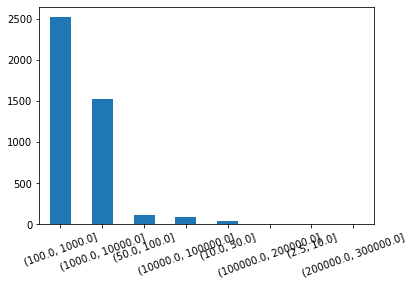

In [0]:
#we use a histogram to clearly indicate
pd.cut(Money_purchase,bins3).value_counts().plot.bar(rot=20)


In [0]:
#Based on the above calculations, the data range of the three indicators of RFM is:

#R [0.0, 12.1]

#F [1.0, 200.0]

#M [2.9, 268478.0]


**8. Modelling**


In [0]:
#8.1 Using RFM models to mine value users

#The first step is to create an RFM matrix and rename the column names.
#Calculate RFM metrics
rfm=Sample_df_NoDupNA.groupby(['CustomerID']).agg({'InvoiceDate':lambda x:(Max_date-x.max()).days,
                                                'InvoiceNo':'count',
                                                'Amount':'sum'})
#Rename columns
rfm.rename(columns={'InvoiceDate':'Recency','InvoiceNo':'Frequency','Amount':'Monetary'},inplace=True)
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,317,1,77183.60
12347.0,31,171,4085.18
12348.0,67,31,1797.24
12349.0,10,73,1757.55
12350.0,302,17,334.40


In [0]:
#The second step is to establish a user behaviour scoring mechanism with a score from 1-4. 
#For the Recency, the larger the value, the smaller the score is because e-retailers prefer recently active users. 
#For Frequency and Monetary, the higher the frequency of purchase and the monetary, the higher the score is.
#Building RFM rating principle
r_labels=range(4,0,-1)
f_labels=range(1,5,1)
m_labels=range(1,5,1)

In [0]:
#The user behaviour is divided according to the three tags of the RFM defined above.
#the data under each tag is divided into 4 equal parts using the pd.qcut function so the score is assigned.
r_quartiles = pd.qcut(rfm['Recency'],q=4,labels=r_labels)
f_quartiles = pd.qcut(rfm['Frequency'],q=4,labels=f_labels)
m_quartiles = pd.qcut(rfm['Monetary'],q=4,labels=m_labels)

rfm = rfm.assign(R=r_quartiles, F=f_quartiles, M=m_quartiles)

In [0]:
#With the score of each tag of the RFM, statistics are calculated and the final score of each user is calculated as the sum score of each tag.
#Calculate RFM Segment and RFM Score
def add_rfm(x):
    return str(x['R'])+str(x['F'])+str(x['M'])

rfm['RFM_Segment']=rfm.apply(add_rfm,axis=1)
rfm['RFM_Score']=rfm[['R','F','M']].sum(axis=1)
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346.0,317,1,77183.60,1,1,4,114,6.0
12347.0,31,171,4085.18,3,4,4,344,11.0
12348.0,67,31,1797.24,2,2,4,224,8.0
12349.0,10,73,1757.55,4,3,4,434,11.0
12350.0,302,17,334.40,1,1,2,112,4.0


In [0]:
#We'll now take a look at the statistics of the RFM comprehensive score. 
#The overall score has minimum value of 3 points and the maximum value is 12 points.
rfm.groupby('RFM_Score').agg({'Recency':'mean','Frequency':'mean','Monetary':['mean','count']}).round(1)

Recency Frequency Monetary      
             mean      mean     mean count
RFM_Score                                 
3.0         255.2       8.1    154.6   382
4.0         178.4      13.9    237.9   376
5.0         151.1      20.2    365.7   495
6.0          96.0      27.0    795.2   478
7.0          77.3      37.2    727.5   450
8.0          60.7      52.5    971.1   458
9.0          47.4      77.1   1354.4   404
10.0         33.2     113.5   1893.4   437
11.0         20.5     186.7   4150.3   419
12.0          7.4     363.4   9484.0   398

In [0]:
#The users are divided into 10 levels according to RFM's comprehensive score i.e. RFM_Score. 
#In practice, a rough division may be required. The users are divided into 3 general levels.
#We'll create grades gold, silver, and bronze
#The RFM scores are 10-12 (gold), 6-9 (silver) and 3-5 (bronze) respectively.

#Use RFM score to group customers into Gold, Silver, Bronze segments:
def segments(df):
    if df['RFM_Score']>9:
        return 'Gold'
    elif (df['RFM_Score']>5) and (df['RFM_Score']<=9):
        return 'Silver'
    else:
        return 'Bronze'
    
rfm['General_Segment']=rfm.apply(segments,axis=1)
rfm.groupby('General_Segment').agg({'Recency':'mean','Frequency':'mean','Monetary':['mean','count']}).round(1)



Recency Frequency Monetary      
                   mean      mean     mean count
General_Segment                                 
Bronze            191.0      14.6    263.0  1253
Gold               20.8     217.3   5056.7  1254
Silver             71.3      47.4    949.4  1790

In [0]:
#In this way, all users can be divided according to the above RFM model, 
#and the value user can be identified according to the General_Segment or according to RFM_Score.
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,General_Segment
CustomerID,,,,,,,,,
12346.0,317,1,77183.60,1,1,4,114,6.0,Silver
12347.0,31,171,4085.18,3,4,4,344,11.0,Gold
12348.0,67,31,1797.24,2,2,4,224,8.0,Silver
12349.0,10,73,1757.55,4,3,4,434,11.0,Gold
12350.0,302,17,334.40,1,1,2,112,4.0,Bronze


**9. K-Means Clustering**

In [0]:
#There are three limitations to the application of K-Means algorithm: 
#(1) the distribution of the labels is symmetrical, not skewed; 
#(2) the same average value of the labels; 
#(3) the same variance of the labels.

#To solve these limitations, these are the solutions:
#(1)Logarithmic transformation
#(2)standardization


In [0]:
#9.1 Logarithmic transformation
rfm_k=rfm[['Recency','Frequency','Monetary']]
#unskew the data with log transformation
rfm_log=rfm[['Recency','Frequency','Monetary']].apply(np.log,axis=1).round(3)

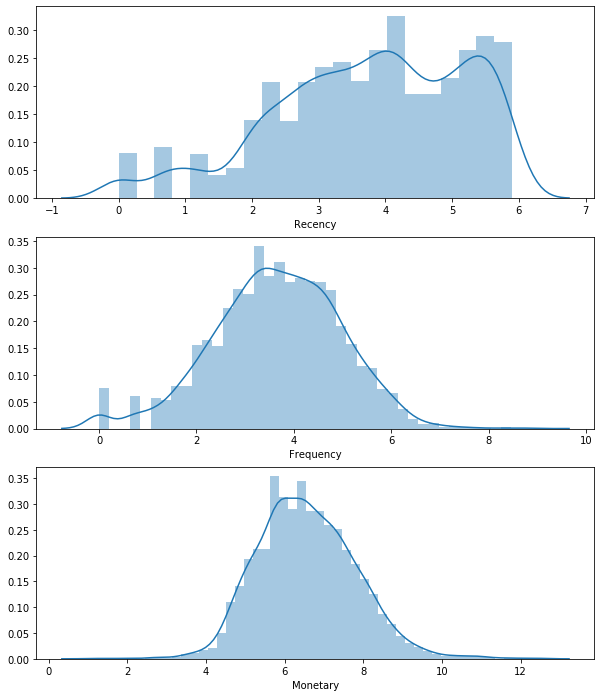

In [0]:
#9.1.1 Plot histograms of the three labels together.
#plot the distribution of RFM values
f,ax=plt.subplots(figsize=(10,12))
plt.subplot(3,1,1);sns.distplot(rfm_log.Recency,label='Recency')
plt.subplot(3,1,2);sns.distplot(rfm_log.Frequency,label='Frequency')
plt.subplot(3,1,3);sns.distplot(rfm_log.Monetary,label='Monetary')
plt.show()

In [0]:
#9.1.2 Standardization
scaler = StandardScaler()
scaler.fit(rfm_log)
#Store it separately for clustering
rfm_normalized=scaler.transform(rfm_log)

In [0]:
#9.1.3 select the appropriate number of clusters
#1st step: get the best KMeans
ks = range(1,8)
inertias=[]

for k in ks:
    kc = KMeans(n_clusters=k, random_state=1)
    kc.fit(rfm_normalized)
    inertias.append(kc.inertia_)#sum of squared distances of samples to their closest cluster center

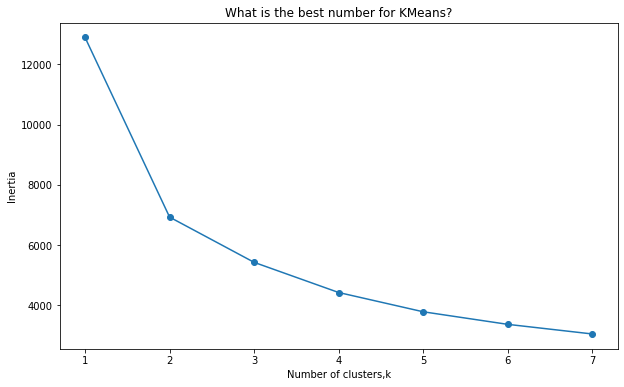

In [0]:
#9.1.4 Drawing the calculated number of 1-8 clusters together and locate elbow bends
#plot ks vs inertias
f,ax = plt.subplots(figsize=(10,6))
plt.plot(ks,inertias,'-o')
plt.xlabel('Number of clusters,k')
plt.ylabel('Inertia')
plt.title('What is the best number for KMeans?')
plt.show()

In [0]:
#The principle of the K-Means clustering method, simply speaking, it is to find the center point of the cluster. 
#It can be an existing numerical point or a numerical point that does not actually exist in the data set. 
#For example, there are 3 clusters. 
#The cluster center points calculate the distance from each point in the data set to the three center points, and classify the data points into the center point category with the shortest distance.

#9.1.5 Building the model using machine learning algorithm
# clustering
kc=KMeans(n_clusters=3,random_state=1)
kc.fit(rfm_normalized)

# Create a cluster label column in the original DataFrame
cluster_labels = kc.labels_

# Calculate average RFM values and size for each cluster
rfm_k3=rfm_k.assign(k_cluster=cluster_labels)

#Calculate average RFM values and sizes for each cluster
rfm_k3.groupby('k_cluster').agg({'Recency':'mean','Frequency':'mean','Monetary':['mean','count']}).round(0)

Recency Frequency Monetary      
             mean      mean     mean count
k_cluster                                 
0            67.0      58.0   1054.0  1816
1           174.0      15.0    290.0  1461
2            17.0     244.0   5915.0  1020

In [0]:
#By comparing the RF/Silver\Bronze of the RFM model, 
#the three clusters 0, 1, and 2 obtained here correspond to Silver\Bronze\Gold, and the most valuable 
#user group is the user of the category with k_cluster = 2.

#9.1.6 Use the K-Means algorithm to classify users in order to mine value users.
rfm_k3.head()

,Recency,Frequency,Monetary,k_cluster
CustomerID,,,,
12346.0,317,1,77183.60,0
12347.0,31,171,4085.18,2
12348.0,67,31,1797.24,0
12349.0,10,73,1757.55,2
12350.0,302,17,334.40,1


According to the above results, find the value users with k_cluster=2, future study can be conducted with analysis on the value behavior of the value user, such as consumption habits (shopping frequency and time), types of goods that value customers like to buy, relevance of shopping types (products you like to buy together), etc. It can provide value users with a personalized consumption plan therfore a consumer-centric intelligent business model for value users can be achieved.

Here we use the unsupervised type of machine learning, K-Means algorithm. This unsupervised machine learning does not produce a predict value. If we want to verify the validity and accuracy of the above-mentioned RFM model and K-Means algorithm for value user mining, it can be achieved by implementing actual strategy and verified against the actual situation.

**10. Mining Results**

In [0]:
#10.1 Value Customer Portrait
#Users have already been clustered.
#we will then look at the consumer behavior characteristics of different groups.

#The results of grouping using RFM models and scoring methods show that for value customers the average value of the most recent consumption is 20.8 days, 
#the average shopping frequency is 217.3 times, and the average money spend is 5056.7 pounds.

# cov = coefficient of variance
def cov(x):
    return np.std(x)/np.mean(x)

rfm.groupby('General_Segment').agg({'Recency':['mean','std',cov],'Frequency':['mean','std',cov],'Monetary':['mean','std',cov]}).round(1)

Recency             Frequency  ...      Monetary              
                   mean    std  cov      mean  ...  cov     mean      std  cov
General_Segment                                ...                            
Bronze            191.0  100.8  0.5      14.6  ...  0.8    263.0    177.7  0.7
Gold               20.8   22.5  1.1     217.3  ...  1.7   5056.7  14721.6  2.9
Silver             71.3   70.9  1.0      47.4  ...  0.8    949.4   2433.2  2.6

[3 rows x 9 columns]

In [0]:
# cov = coefficient of variance
#The above results are obtained using the K-Means method. 
#The average value of the value user's last consumption is 16.8 days, 
#the average shopping frequency is 244.2 times, and the average cost is 5916.3 pounds. 
#The result is better than using the scoring method.

def cov(x):
    return np.std(x)/np.mean(x)

rfm_k3_sta=rfm_k3.groupby('k_cluster').agg({'Recency':['mean','std',cov],'Frequency':['mean','std',cov],'Monetary':['mean','std',cov]}).round(1)
rfm_k3_sta   

Recency             Frequency             Monetary              
             mean    std  cov      mean    std  cov     mean      std  cov
k_cluster                                                                 
0            67.2   66.9  1.0      58.0   39.4  0.7   1053.8   2385.6  2.3
1           173.9  106.5  0.6      14.6   11.1  0.8    289.9    269.4  0.9
2            16.6   18.9  1.1     244.1  394.7  1.6   5914.5  16208.2  2.7

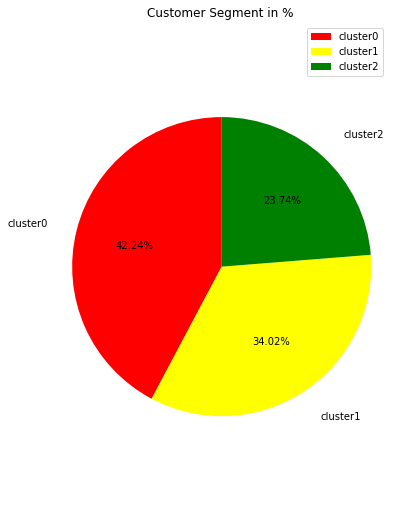

In [0]:
#10.2 Value Customer Contribution to Total Sales
# different customer category and the number of customer using K-means
customer_num=rfm_k3.groupby('k_cluster').agg({'Recency':['count']})
# pie figure
fig=plt.figure(figsize=(6,9))
test=[1815,1462,1020]
labels = [u'cluster0',u'cluster1',u'cluster2']
colors=['red','yellow','green']
patches,text1,text2 = plt.pie(test,
                      labels=labels,
                      colors=colors,
                      autopct = '%3.2f%%',
                      labeldistance = 1.2,
                      shadow=False,
                      startangle=90,
                      pctdistance = 0.6)
plt.axis('equal')
plt.legend()
plt.title('Customer Segment in %')
plt.show()
fig.savefig('segmentINpercent.png')

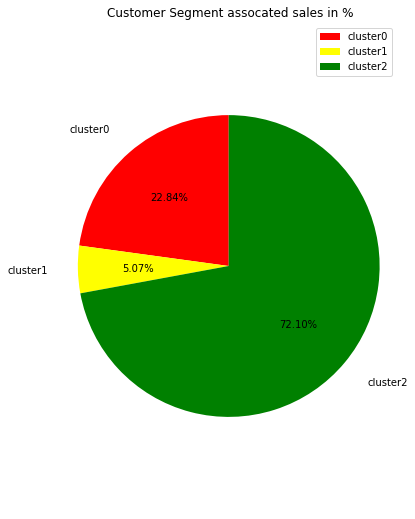

In [0]:
#The above figure shows the clustering results. According to the value contribution, the ranking is cluster2, cluster0, cluster1, and the value customer is defined as cluster2 which accounts for 23.74%. 
#Let's look at the contribution of different user groups to sales.

# different customer category and associated sales using K-means
customer_sales=rfm_k3.groupby('k_cluster').agg({'Monetary':['sum']})
# pie figure
fig=plt.figure(figsize=(6,9))
test=[1911297.113,424054.261,6034667.080]
labels = [u'cluster0',u'cluster1',u'cluster2']
colors=['red','yellow','green']
patches,text1,text2 = plt.pie(test,
                      labels=labels,
                      colors=colors,
                      autopct = '%3.2f%%',
                      labeldistance = 1.2,
                      shadow=False,
                      startangle=90,
                      pctdistance = 0.6)
plt.axis('equal')
plt.legend()
plt.title('Customer Segment assocated sales in %')
plt.show()
fig.savefig('segmentSales.png')

This analysis uses Python language to analyze and mine e-commerce value customers. There are two main aspects of this data analysis: (1) describing statistical analysis; (2) using two methods, i.e. RFM model and K-Means machine learning algorithm to mine Value user.

(1) By calculate the descriptive statistical indictors, we can learn the overall operation of the e-commerce companies. Operational indicators, such as the monthly sales volume, monthly sales total, monthly average sales, weekly sales volume, weekly sales total, weekly average sales, and sales per customer are calculated. Through these indicators, we learned that the e-commerce company's monthly sales orders and monthly sales increased significantly in September, October and November 2011, and weekly sales has the highest value on Thursday.

(2) In order to mine value users, we use two methods, the first method is using the RFM model and rating to “manually” classify users, and the second method is using the K-Means machine learning algorithm to automatically mine value users. Comparing the results of the user's portraits obtained by the two methods, the K-Means method yielded better results. The value of the users that were eventually mined accounted for 23.74% but contributed 72.10% of the sales.

Further study can be conducted to learn the consumption habits of value users to provide a consumer-centric intelligent business model. Of course, this needs to be iteratively improved according to the actual application in order to optimize the value user mining process.